In [1]:
import numpy as np
import os 
import sys
import numba 
import matplotlib.pyplot as plt
import iminuit 
import scipy

from template_fit import *

In [2]:
template = LXeTemplate.load('lxe.template')

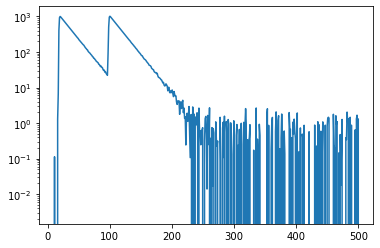

In [3]:
data = make_fake_data_from_template(template.template, [100,20], [1000,1000], noisefloor=1)
plt.plot(*data)
plt.yscale("log")
plt.show()

In [4]:
template.template(10)

array(0.616962)

0 [0, 0, 0]


(<Figure size 1080x360 with 1 Axes>, <AxesSubplot:>)

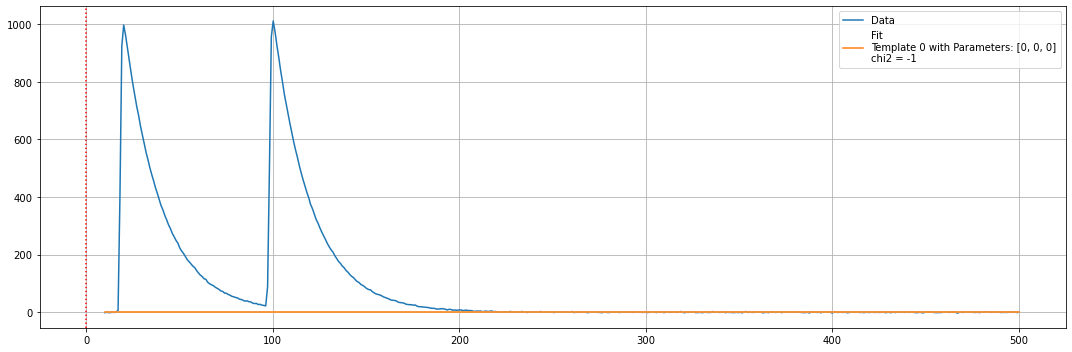

In [5]:
fit = TemplateFit(data, template.template, verbose=True)
# fit.do_fit()
fit.plot()

**********************************************************************************
Fitting with Current guess: [1011.4993405809155, 0, -100.1840490797546]
1011.4993405809155 100.1840490797546
Fit valid: False
Fit params: <ValueView x0=1011.4993405809155 x1=0.0 x2=-100.1840490797546>
Fit chi2: 24168.607757422655


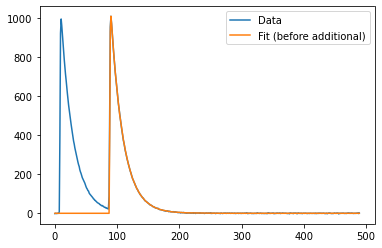

997.4572981239678 20.02044989775051
   -> Residual Fit valid: False
   -> Residual Fit params: <ValueView x0=997.4572981239679 x1=0.0 x2=-20.02044989775051>
   -> Residual Fit chi2: 36.99609684696658


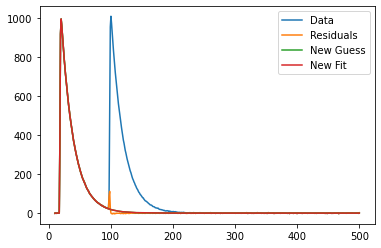

**********************************************************************************
Fitting with Current guess: [1011.4993405809155, 0.0, -100.1840490797546, 997.4572981239679, 0.0, -20.02044989775051]
997.4572981239678 20.02044989775051
Fit valid: False
Fit params: <ValueView x0=1011.4993405809155 x1=0.0 x2=-99.99944850839508 x3=997.457298123968 x4=0.0 x5=-20.02044989775051>
Fit chi2: 4.622306029117351


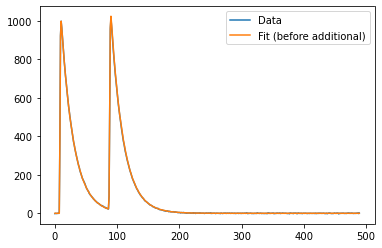

11.773882766105714 18.016359918200408
   -> Residual Fit valid: False
   -> Residual Fit params: <ValueView x0=11.773882766105714 x1=0.0 x2=-17.554966414612643>
   -> Residual Fit chi2: 6.398682989703566


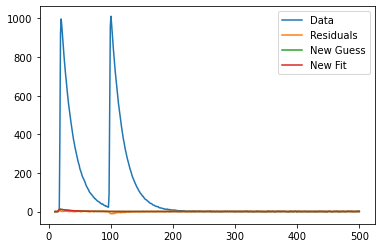

In [6]:
fit.do_fit()

0 [1011.4993405809155, 0.0, -99.99944850839508]
1 [997.457298123968, 0.0, -20.02044989775051]


(<Figure size 1080x360 with 1 Axes>, <AxesSubplot:>)

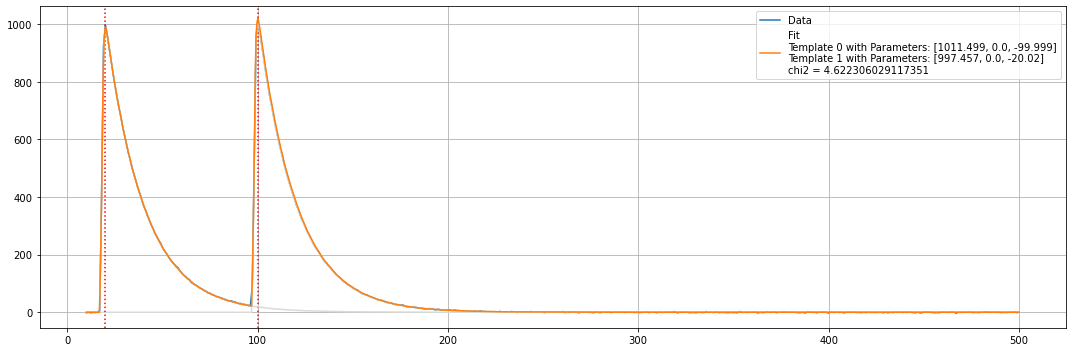

In [7]:
fit.plot()

In [13]:
prefix = './images/pulse_seperation_plot_lxe_'
os.system(f"rm -f {prefix}*")
for i, x in enumerate(np.linspace(0,400,150)):
    times, energies = [100,x], [10000,1000]
    data = make_fake_data_from_template(template.template,times, energies , noisefloor=10)
    fit = TemplateFit(data, template.template, verbose=False, chi2limit=100)
    fit.do_fit()
    fig,ax = fit.plot()
    plt.xlim(-100,500)
    plt.title(f"Template Fit of 2 Pulses with Pulse Heights {energies} and Times {[round(x,2) for x in times]}")
    plt.tight_layout()
    plt.savefig(f"{prefix}{str(i).zfill(4)}_{energies}_{times}.png", 
                bbox_inches='tight', facecolor='w')
    plt.close()
    # plt.show()
    
    # break
command = f'convert -delay 1 {prefix}*png {prefix}combined.gif'
print(command)
os.system(command)

convert -delay 1 ./images/pulse_seperation_plot_lxe_*png ./images/pulse_seperation_plot_lxe_combined.gif


0